In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

## Flow past a cylinder 

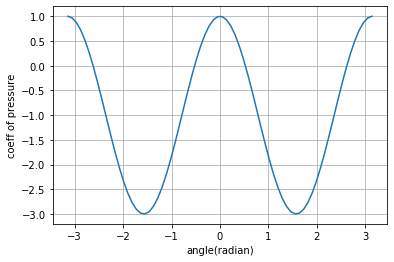

In [92]:
theta=np.linspace(-3.14,3.14,72)
z=np.exp(1j*theta)
U=5
Phi=U*(z+(1/z))
speed=np.abs(U*(1-(1/(z*z))))
Coeff_press=1-((speed/U)**2)
plt.plot(theta,Coeff_press);
plt.xlabel('angle(radian)');
plt.ylabel('coeff of pressure');  
plt.grid();                          #Coefficient of Pressure vs theta

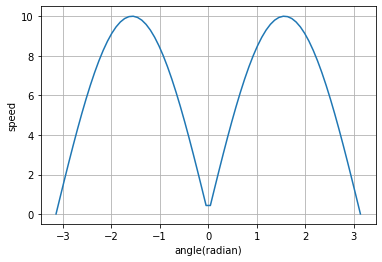

In [93]:
plt.plot(theta,speed);
plt.xlabel('angle(radian)');
plt.ylabel('speed');    
plt.grid();                           #Speed vs theta

## Addition of point vortex

In [121]:
rad,theta_1=np.mgrid[1:5:10j,-1*np.pi:np.pi:72j]
z_1=rad*np.exp(1j*theta_1)
x,y=np.real(z_1),np.imag(z_1)
omega=np.linspace(-1*np.pi,np.pi,72)
z_2=np.exp(1j*omega) 
def stream(gamma):                                         #Streamlines
    Phi_1= U*(z_1+(1/z_1))+ ((-1j*gamma*np.log(z_1))/2*np.pi)
    plt.contour(x,y,np.imag(Phi_1),40)
    plt.xlim(-4,4)
    plt.ylim(-4,4)                 #Cylinder
    plt.plot(np.real(z_2),np.imag(z_2),'r');

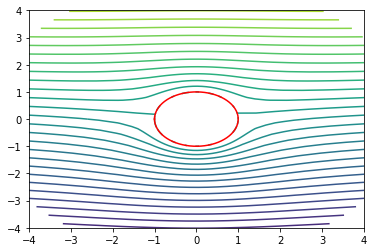

In [122]:
stream(gamma=1)                    #Gamma=1

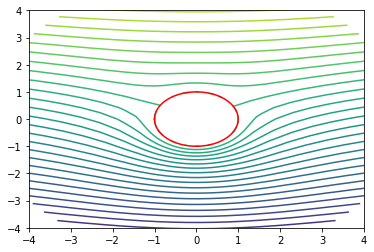

In [123]:
stream(gamma=3)                    #Gamma=3

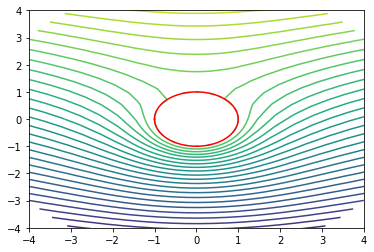

In [124]:
stream(gamma=5)                    #Gamma=5

### Pressure Field

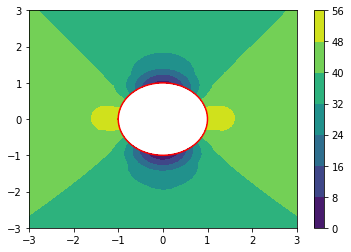

In [134]:
gamma=1
speed_1=np.abs(U*(1-(1/(z_1**2))) + ((-1j*gamma)/(2*np.pi*z_1)))
P_inf=40
P= P_inf + 0.5*((U*U*np.ones_like(speed_1))-(speed_1**2))
plt.contourf(x,y,P);
plt.xlim(-3,3)
plt.ylim(-3,3)  
plt.plot(np.real(z_2),np.imag(z_2),'r');
plt.colorbar();

### Speed vs theta

In [139]:
def speed_dist(gamma):
    speed_2=np.abs(U*(1-(1/(z_2**2))) + ((-1j*gamma)/(2*np.pi*z_2)))    #speed on the surface
    plt.plot(omega,speed_2);
    plt.xlabel('angle(radian)');
    plt.ylabel('speed'); 
    plt.grid();   
    plt.xlim(-1*np.pi,np.pi)         
    plt.ylim(0,11)                                                #Speed vs theta

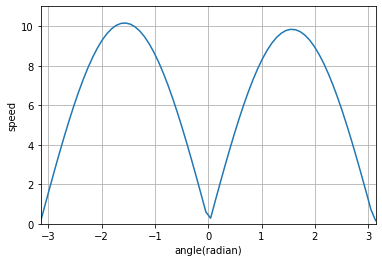

In [140]:
speed_dist(gamma=1)                                                 #Gamma=1

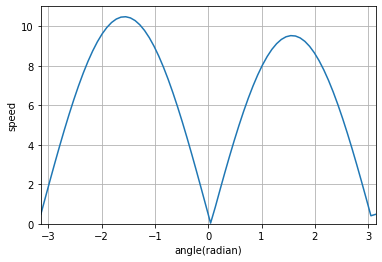

In [141]:
speed_dist(gamma=3)                                                 #Gamma=3

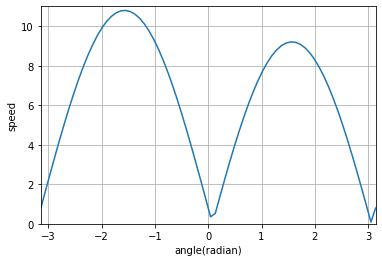

In [142]:
speed_dist(gamma=5)                                                 #Gamma=5

### Coefficient of Pressure 

In [144]:
def Coeff_dist(gamma):
    speed_2=np.abs(U*(1-(1/(z_2**2))) + ((-1j*gamma)/(2*np.pi*z_2)))    #speed on the surface
    coef_2=1-((speed_2**2)/U**2)
    return coef_2
def plotting(data):    
    plt.plot(omega,data);
    plt.xlabel('angle(radian)');
    plt.ylabel('coeff of pressure'); 
    plt.grid();   
    plt.xlim(-1*np.pi,np.pi)

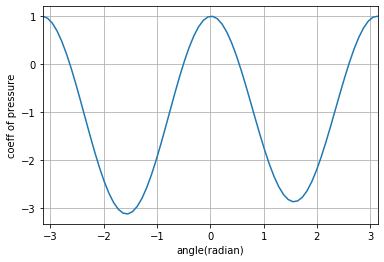

In [145]:
plotting(Coeff_dist(gamma=1))       #Gamma=1

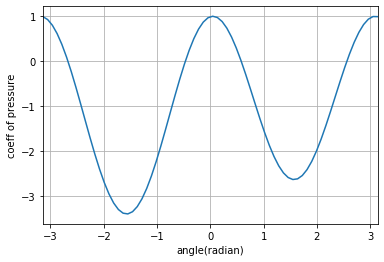

In [146]:
plotting(Coeff_dist(gamma=3))                                                 #Gamma=3

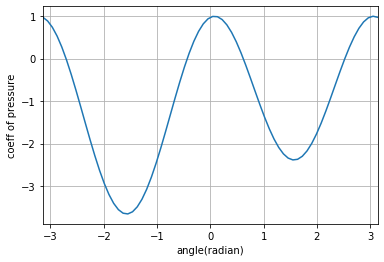

In [147]:
plotting(Coeff_dist(gamma=5))                                                 #Gamma=5

### Lift and Drag forces

In [166]:
def Forces(gamma):
    coef_3=Coeff_dist(gamma)
    Force=np.sum(-1*(0.5*U**2)*(2*np.pi/72)*coef_3*z_2) + (0.5*U**2)*(2*np.pi/72)*coef_3[-1]*z_2[-1]
    Lift=np.imag(Force)
    Drag=np.real(Force)
    print('Lift= ',np.round(Lift,3))
    print('Drag= ',np.round(Drag,3))

In [167]:
Forces(gamma=1)

Lift=  -4.931
Drag=  -0.0


In [168]:
Forces(gamma=3)

Lift=  -14.792
Drag=  -0.0


In [169]:
Forces(gamma=5)

Lift=  -24.653
Drag=  -0.0
